In [119]:
import pandas as pd
import requests
from io import StringIO
import os
from dotenv import load_dotenv
import matplotlib.pyplot  as plt
import seaborn as sns



In [6]:
load_dotenv()

True

# Lectura y Preparación

In [63]:

myurl = os.environ["DETALLE_TAREAS_FULL_URL"] + "?" + os.environ["AZURE_DATALAKE_GENAI_TOKEN"]
df = pd.read_parquet(myurl)
df

,FECHA_CIERRE,CODIGO_TAREA,DESCRIPCION_TAREA,INICIO,FIN,DURACION_SEGUNDOS,DURACION
0,2024-07-23,PX999C17,Depuracion del FSC017,2024-07-24 03:42:24,2024-07-24 03:42:25,1.0,00:00:01
1,2024-11-19,PX999C17,Depuracion del FSC017,2024-11-20 02:26:00,2024-11-20 02:26:01,1.0,00:00:01
2,2024-11-18,PX999C17,Depuracion del FSC017,2024-11-19 03:02:58,2024-11-19 03:02:59,1.0,00:00:01
3,2024-07-24,PX999C17,Depuracion del FSC017,2024-07-25 03:36:06,2024-07-25 03:36:08,2.0,00:00:02
4,2024-07-25,PX999C17,Depuracion del FSC017,2024-07-26 03:36:12,2024-07-26 03:36:13,1.0,00:00:01
...,...,...,...,...,...,...,...
12508,2024-11-14,PCSMI001B,Rendicion Batch,2024-11-15 02:38:05,2024-11-15 02:38:06,1.0,00:00:01
12509,2024-11-15,PCSMI001B,Rendicion Batch,2024-11-16 02:36:57,2024-11-16 02:36:58,1.0,00:00:01
12510,2024-11-16,PCSMI001B,Rendicion Batch,2024-11-17 01:40:20,2024-11-17 01:40:21,1.0,00:00:01
12511,2024-11-18,PCSMI001B,Rendicion Batch,2024-11-19 03:02:57,2024-11-19 03:02:58,1.0,00:00:01


In [64]:
df["FECHA_CIERRE"]=pd.to_datetime(df.FECHA_CIERRE,yearfirst=True,dayfirst=True)
df["DIA_SEMANA"]=df.FECHA_CIERRE.dt.day_of_week+1
df["DIA_SEMANA_NOM"]=df.FECHA_CIERRE.dt.day_name()
df["DIA_MES"]=df.FECHA_CIERRE.dt.days_in_month
df

,FECHA_CIERRE,CODIGO_TAREA,DESCRIPCION_TAREA,INICIO,FIN,DURACION_SEGUNDOS,DURACION,DIA_SEMANA,DIA_SEMANA_NOM,DIA_MES
0,2024-07-23,PX999C17,Depuracion del FSC017,2024-07-24 03:42:24,2024-07-24 03:42:25,1.0,00:00:01,2,Tuesday,31
1,2024-11-19,PX999C17,Depuracion del FSC017,2024-11-20 02:26:00,2024-11-20 02:26:01,1.0,00:00:01,2,Tuesday,30
2,2024-11-18,PX999C17,Depuracion del FSC017,2024-11-19 03:02:58,2024-11-19 03:02:59,1.0,00:00:01,1,Monday,30
3,2024-07-24,PX999C17,Depuracion del FSC017,2024-07-25 03:36:06,2024-07-25 03:36:08,2.0,00:00:02,3,Wednesday,31
4,2024-07-25,PX999C17,Depuracion del FSC017,2024-07-26 03:36:12,2024-07-26 03:36:13,1.0,00:00:01,4,Thursday,31
...,...,...,...,...,...,...,...,...,...,...
12508,2024-11-14,PCSMI001B,Rendicion Batch,2024-11-15 02:38:05,2024-11-15 02:38:06,1.0,00:00:01,4,Thursday,30
12509,2024-11-15,PCSMI001B,Rendicion Batch,2024-11-16 02:36:57,2024-11-16 02:36:58,1.0,00:00:01,5,Friday,30
12510,2024-11-16,PCSMI001B,Rendicion Batch,2024-11-17 01:40:20,2024-11-17 01:40:21,1.0,00:00:01,6,Saturday,30
12511,2024-11-18,PCSMI001B,Rendicion Batch,2024-11-19 03:02:57,2024-11-19 03:02:58,1.0,00:00:01,1,Monday,30


In [65]:
df["ID_TAREA"]=df.CODIGO_TAREA+"-"+df.DESCRIPCION_TAREA
df["DURACION_MIN"]=(df.DURACION_SEGUNDOS/60).round(0)
df["DURACION_HR"]=df.DURACION_SEGUNDOS/60/60
df["PAUSA"]=df.CODIGO_TAREA=="PAUSA"

In [80]:
df["PAUSA"].value_counts()


PAUSA
False    12015
True       498
Name: count, dtype: int64

# Análisis

## Duración total

### Distribución

In [58]:
df.groupby(["FECHA_CIERRE"], as_index=False,)["DURACION_MIN"].agg(["max","min","mean","median","sum"]	).sort_values("sum",ascending=False)

,FECHA_CIERRE,max,min,mean,median,sum
7,2024-07-31,111.0,0.0,4.762500,1.0,762.0
3,2024-07-26,203.0,0.0,5.503817,0.0,721.0
12,2024-08-06,180.0,0.0,4.559055,0.0,579.0
63,2024-10-07,106.0,0.0,4.285714,0.0,540.0
86,2024-11-05,110.0,0.0,4.095238,0.0,516.0
...,...,...,...,...,...,...
82,2024-10-30,39.0,0.0,2.484127,0.0,313.0
56,2024-09-28,37.0,0.0,2.440945,0.0,310.0
90,2024-11-09,29.0,0.0,2.373016,0.0,299.0
94,2024-11-15,31.0,0.0,2.365079,0.0,298.0


array([[<Axes: title={'center': 'sum'}>]], dtype=object)

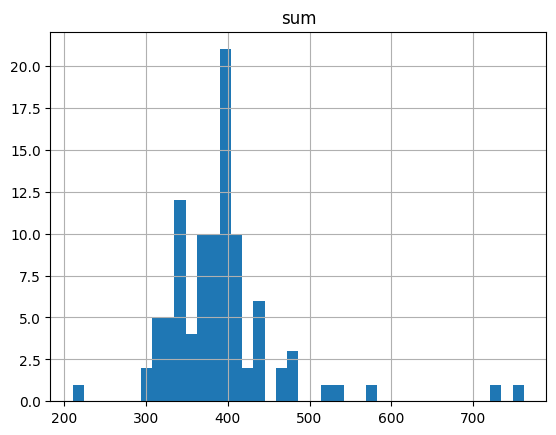

In [106]:
df.groupby(["FECHA_CIERRE"], )["DURACION_MIN"].agg(["sum"]	).hist(bins=40)

In [103]:
df.groupby(["FECHA_CIERRE"], )["DURACION_MIN"].agg(["sum"]	).describe()

,sum
count,98.000000
mean,391.938776
std,72.593177
min,211.000000
25%,346.000000
50%,390.000000
75%,407.250000
max,762.000000


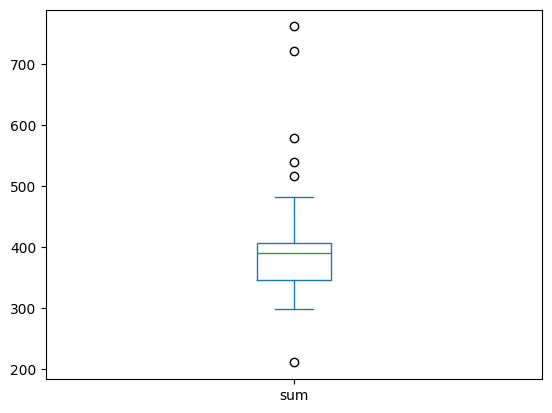

In [73]:
df.groupby(["FECHA_CIERRE"], )["DURACION_MIN"].agg(["sum"]	).plot.box()

Conclusion. Distribución de cola derecha con valores extremos (anomalias) por encima de 500

## Pausas

In [102]:
df_sum=df.groupby("FECHA_CIERRE", as_index=True)["DURACION_MIN"].agg(["max","sum"])
df_sum.rename(columns={"max":"TAREA_MAX","sum":"TOTAL"}, inplace=True)
df_sum_pausas=df[df["PAUSA"]].groupby("FECHA_CIERRE", as_index=False)["DURACION_MIN"].sum()
df_sum_pausas.set_index("FECHA_CIERRE", inplace=True)
df_sum_pausas.rename(columns={"DURACION_MIN":"DURACION_PAUSAS"},inplace=True)
df_sum=df_sum.join(df_sum_pausas,)
df_sum

,TAREA_MAX,TOTAL,DURACION_PAUSAS
FECHA_CIERRE,,,
2024-07-23,32.0,211.0,5.0
2024-07-24,67.0,436.0,74.0
2024-07-25,65.0,445.0,80.0
2024-07-26,203.0,721.0,77.0
2024-07-27,46.0,408.0,63.0
...,...,...,...
2024-11-14,41.0,382.0,78.0
2024-11-15,31.0,298.0,29.0
2024-11-16,38.0,337.0,86.0


<Axes: xlabel='FECHA_CIERRE'>

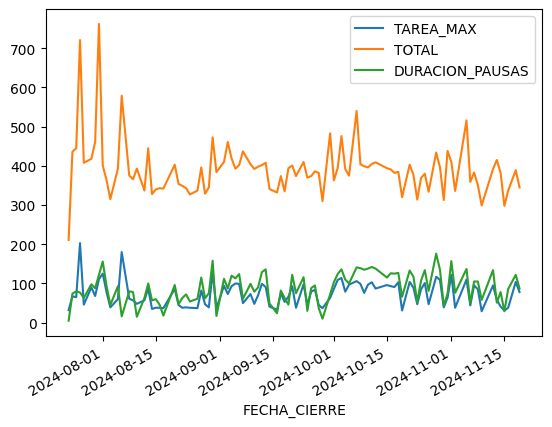

In [110]:
df_sum.plot(subplots=False)

array([[<Axes: title={'center': 'sum'}>]], dtype=object)

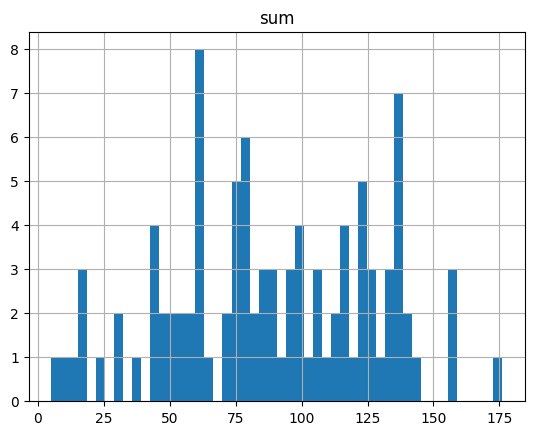

In [107]:
df_sum.groupby(["FECHA_CIERRE"], )["DURACION_PAUSAS"].agg(["sum"]	).hist(bins=50)

## Tareas representativas

### Top tareas minutos totales

In [93]:
df_tareas_agg=df.groupby(["ID_TAREA"], as_index=True,)["DURACION_MIN"].agg(["max","min","mean","median","count","sum"]	).sort_values("sum",ascending=False)


In [117]:
df_agg_top=df_tareas_agg.sort_values("sum",ascending=False).head(10)
df_agg_top


,max,min,mean,median,count,sum
ID_TAREA,,,,,,
PAUSA-Pausa cargar interfaz SIAD new,122.0,0.0,61.937500,74.0,80,4955.0
PBCGD017-GENERACION FSH012 NUEVO,42.0,27.0,34.663265,36.0,98,3397.0
PSNG9122-Genera Datos Tablon,32.0,17.0,18.845361,18.0,97,1828.0
PJBWM077-Carga datos para tablas ICS,46.0,14.0,18.438776,18.0,98,1807.0
PAUSA-PAUSA para cargar pagos,129.0,0.0,17.608247,11.0,97,1708.0
PP017-Depurador,30.0,12.0,17.367347,17.0,98,1702.0
PNU00002-Devengamiento a Plazo,33.0,11.0,17.092784,17.0,97,1658.0
PNU00217-Pasaje Resultados M/E a M/N Ac,64.0,7.0,16.918367,16.0,98,1658.0
PCC00003-Devengamiento Vista,72.0,11.0,14.826531,14.0,98,1453.0


<Figure size 3000x300 with 0 Axes>

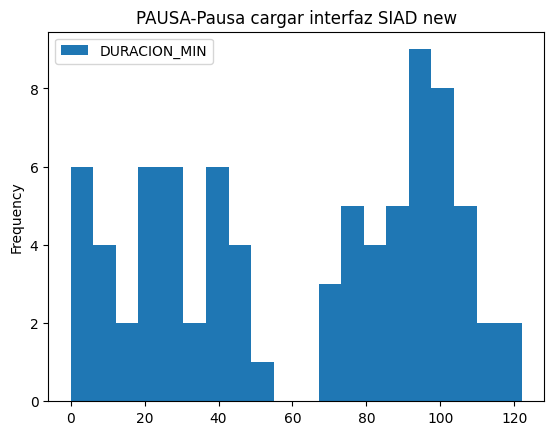

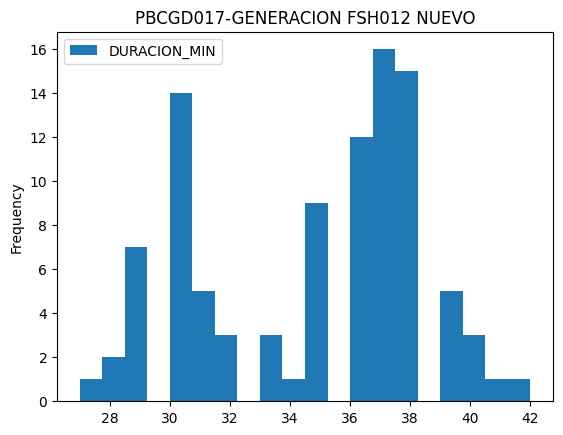

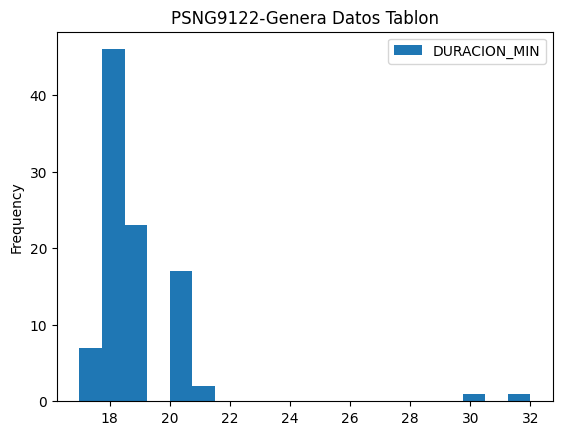

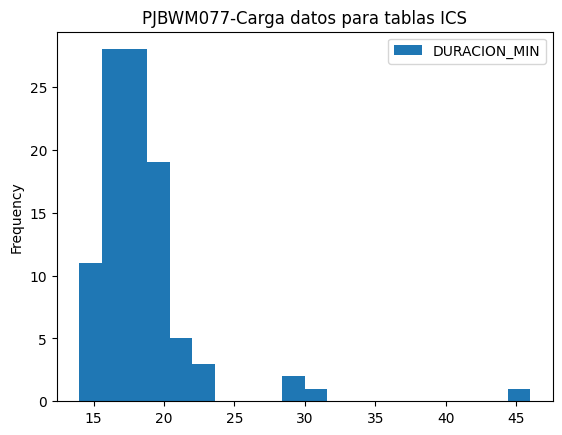

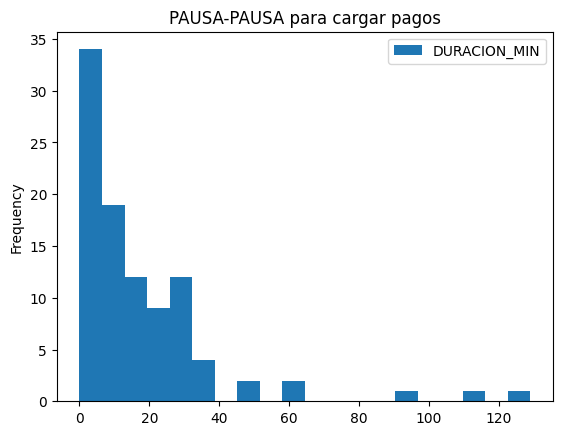

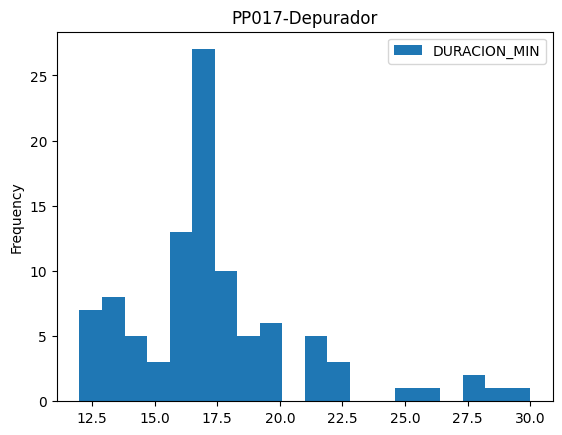

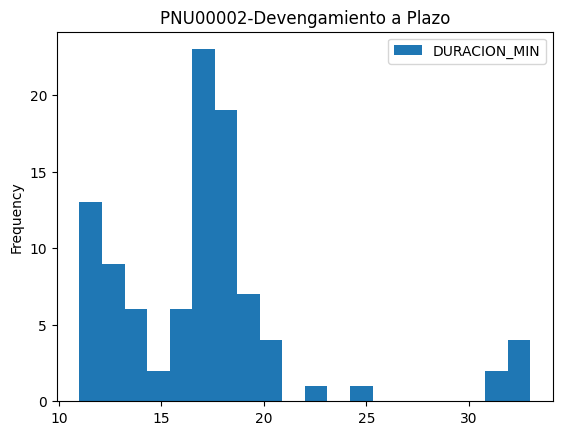

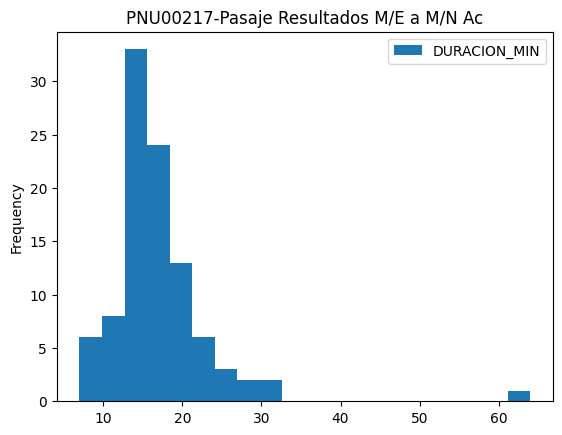

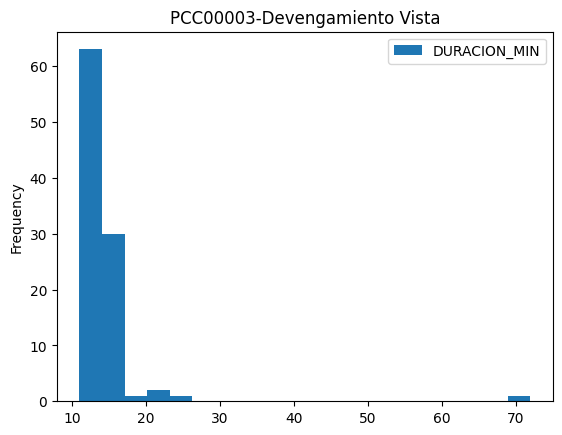

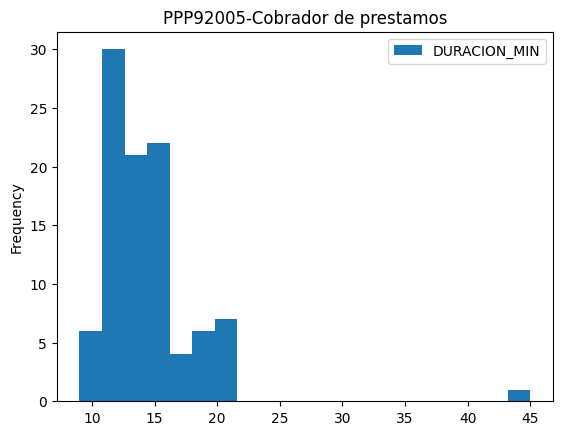

In [143]:
lst_top=df_agg_top.index.to_list()
plt.figure(figsize=(30,3)) 
for tarea in lst_top:
    df[df["ID_TAREA"]==tarea][["ID_TAREA","DURACION_MIN"]].plot.hist(bins=20,by="ID_TAREA")
   

In [128]:
df_tareas_agg.sort_values("max",ascending=False).head(10)

,max,min,mean,median,count,sum
ID_TAREA,,,,,,
PJBWP076-Estado Cuentas Vistas,203.0,5.0,38.125000,16.5,8,305.0
PBCGD011-Generacion H12 Fecha Valor,180.0,1.0,4.734694,1.0,98,464.0
PAUSA-PAUSA para cargar pagos,129.0,0.0,17.608247,11.0,97,1708.0
PAUSA-PAUSA cargue interfaz SIAD,125.0,4.0,65.400000,67.5,10,654.0
PAUSA-Pausa cargar interfaz SIAD new,122.0,0.0,61.937500,74.0,80,4955.0
PNU00001-Pasaje de rubros,107.0,1.0,3.386139,2.0,101,342.0
PAUSA-Pausa cargar interfaz SIAD,87.0,2.0,33.600000,31.5,10,336.0
PCC00003-Devengamiento Vista,72.0,11.0,14.826531,14.0,98,1453.0
PAHP900-Alta incremento Ahorro Program,66.0,0.0,0.680412,0.0,97,66.0


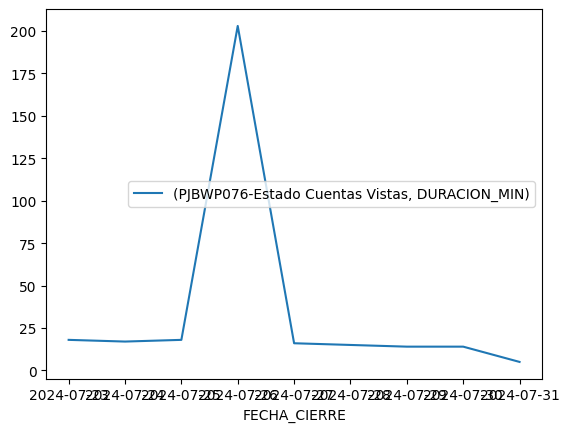

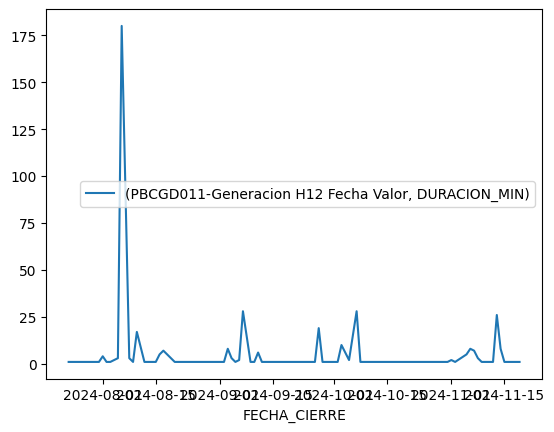

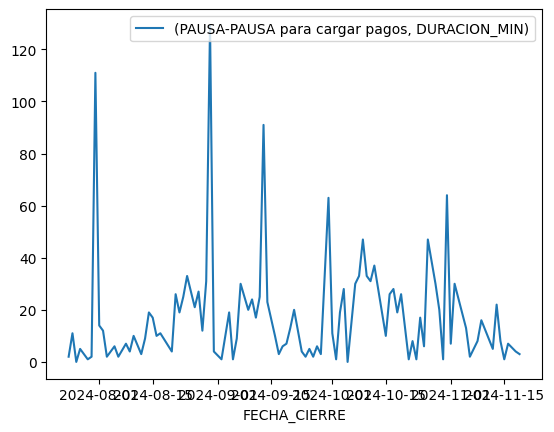

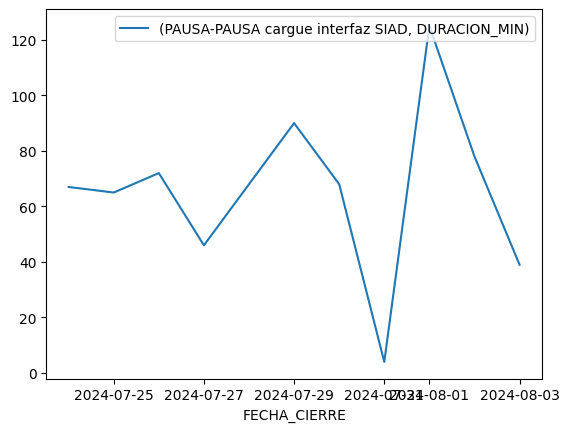

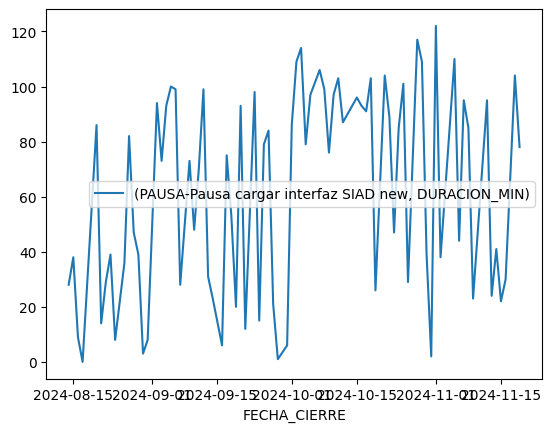

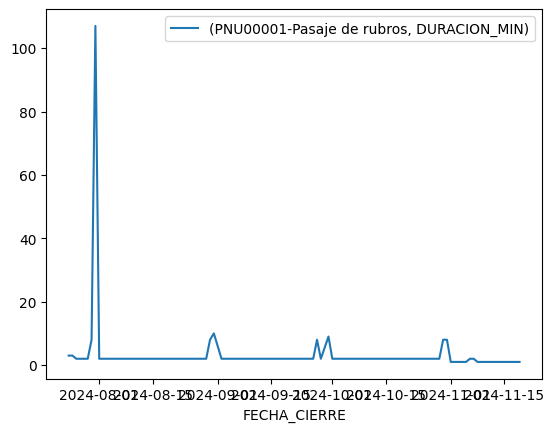

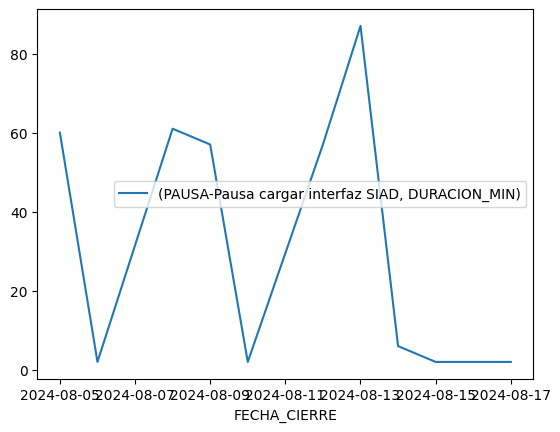

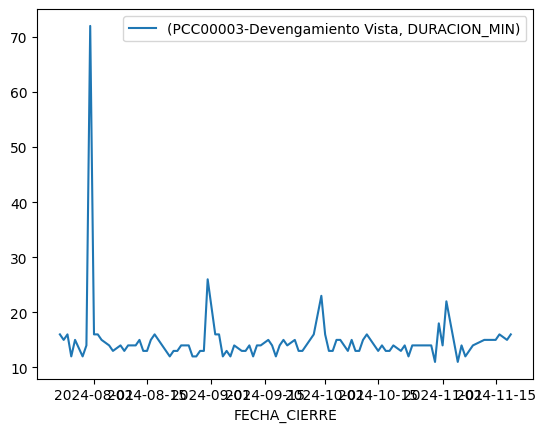

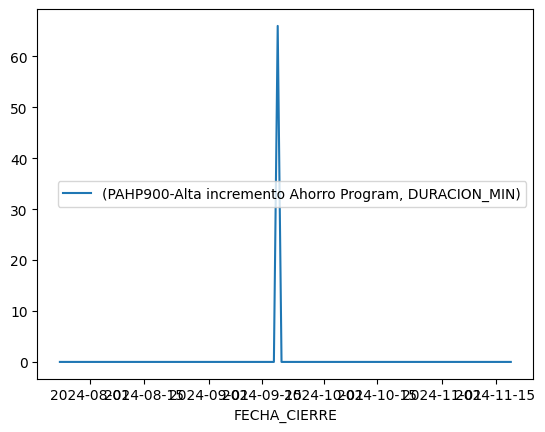

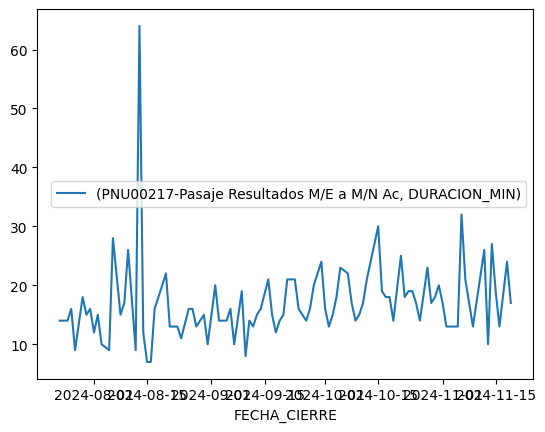

In [144]:

for tarea in df_tareas_agg.sort_values("max",ascending=False).head(10).index:
     df[df["ID_TAREA"]==tarea].groupby("FECHA_CIERRE")[["ID_TAREA","DURACION_MIN"]].max().plot(by="ID_TAREA")
    

## Estacionalidad semanal

array([<Axes: xlabel='DIA_SEMANA'>, <Axes: xlabel='DIA_SEMANA'>,
       <Axes: xlabel='DIA_SEMANA'>], dtype=object)

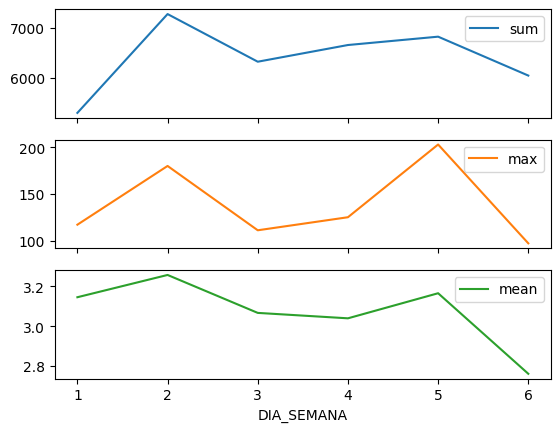

In [126]:
df.groupby("DIA_SEMANA",)["DURACION_MIN"].agg(["sum","max","mean"]).plot(subplots=True)